In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the COVID-19_Vaccination_Trends_in_the_United_States_National_and_Jurisdictional
covid_19 = pd.read_csv(r'C:\Users\Faisal Askari\Downloads\COVID-19_Vaccination_Trends_in_the_United_States_National_and_Jurisdictional.csv')


In [2]:
# Initail inspection of the data
covid_19.head(10)

,Date,date_type,MMWR_week,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,...,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative,Bivalent_Booster_7_Day_Rolling_Average,Bivalent_Booster_Pop_Pct
0,05/10/2023,Report,19,CO,15097,13033446,NaN,1527,4837792,NaN,...,NaN,57.9,1062,794838,NaN,62.9,9725,1272115,NaN,22.1
1,05/10/2023,Report,19,AZ,16505,14647405,NaN,2955,5704677,NaN,...,NaN,50.2,1312,794699,NaN,54.3,11388,1148060,NaN,15.8
2,05/10/2023,Report,19,MN,16020,12829141,NaN,1282,4461994,NaN,...,NaN,63.6,1196,983284,NaN,67.8,5497,1510743,NaN,26.8
3,05/10/2023,Report,19,ID,3526,2894361,NaN,323,1146055,NaN,...,NaN,48.8,281,173862,NaN,54.8,2032,248989,NaN,13.9
4,05/10/2023,Report,19,DC,31,2137377,NaN,264,836680,NaN,...,NaN,51.4,106,80880,NaN,55.9,509,226857,NaN,32.1
5,05/10/2023,Report,19,AK,1582,1328221,NaN,130,535718,NaN,...,NaN,49.8,164,69502,NaN,54.7,640,103624,NaN,14.2
6,05/10/2023,Report,19,IA,4200,6131087,NaN,394,2235485,NaN,...,NaN,57.6,462,460603,NaN,61.7,2851,633634,NaN,20.1
7,05/10/2023,Report,19,VI,69,155357,NaN,38,75415,NaN,...,NaN,31.4,2,2059,NaN,15.0,54,4216,NaN,4.0
8,05/10/2023,Report,19,MD,18105,14722268,NaN,1694,5566178,NaN,...,NaN,57.0,1390,934215,NaN,61.8,11163,1477280,NaN,24.4
9,05/10/2023,Report,19,LA,4386,6961453,NaN,503,2924163,NaN,...,NaN,43.3,691,320045,NaN,41.7,3368,359527,NaN,7.7


In [3]:
# data count and missing valuses
# for data info, columns
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88560 entries, 0 to 88559
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date                                         88560 non-null  object 
 1   date_type                                    88560 non-null  object 
 2   MMWR_week                                    88560 non-null  int64  
 3   Location                                     88560 non-null  object 
 4   Administered_Daily                           88560 non-null  int64  
 5   Administered_Cumulative                      88560 non-null  int64  
 6   Administered_7_Day_Rolling_Average           85740 non-null  float64
 7   Admin_Dose_1_Daily                           88560 non-null  int64  
 8   Admin_Dose_1_Cumulative                      88560 non-null  int64  
 9   Admin_Dose_1_Day_Rolling_Average             85740 non-null  float64
 10

In [4]:
# data types for each colunms
covid_19.dtypes

Date                                            object
date_type                                       object
MMWR_week                                        int64
Location                                        object
Administered_Daily                               int64
Administered_Cumulative                          int64
Administered_7_Day_Rolling_Average             float64
Admin_Dose_1_Daily                               int64
Admin_Dose_1_Cumulative                          int64
Admin_Dose_1_Day_Rolling_Average               float64
Administered_Dose1_Pop_Pct                     float64
Administered_daily_change_report               float64
Administered_daily_change_report_7dayroll      float64
Series_Complete_Daily                            int64
Series_Complete_Cumulative                       int64
Series_Complete_Day_Rolling_Average            float64
Series_Complete_Pop_Pct                        float64
Booster_Daily                                    int64
Booster_Cu

In [5]:
# summary statistics for numerical columns (mean, std, min, max, quartiles). This helps you understand the range and distribution of values.
covid_19.describe()

,MMWR_week,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Administered_Dose1_Pop_Pct,Administered_daily_change_report,Administered_daily_change_report_7dayroll,...,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative,Bivalent_Booster_7_Day_Rolling_Average,Bivalent_Booster_Pop_Pct
count,88560.000000,8.856000e+04,8.856000e+04,8.574000e+04,8.856000e+04,8.856000e+04,8.574000e+04,88560.000000,6.750000e+04,6.642000e+04,...,8.574000e+04,88560.000000,8.856000e+04,8.856000e+04,8.574000e+04,88560.000000,8.856000e+04,8.856000e+04,85740.000000,88560.000000
mean,24.184282,3.047281e+04,1.443859e+07,2.950543e+04,1.217679e+04,6.734796e+06,1.232009e+04,60.130964,1.775520e+04,3.570572e+04,...,5.193336e+03,24.903567,1.658379e+03,2.818553e+05,1.222153e+03,12.053774,2.548184e+03,2.635163e+05,1314.248006,2.373743
std,15.572671,1.669457e+05,6.168123e+07,1.528095e+05,1.316248e+05,2.797264e+07,8.676677e+04,25.595667,1.298657e+05,1.717234e+05,...,4.119929e+04,23.488342,4.376887e+04,2.062760e+06,1.847214e+04,19.317192,6.550489e+04,2.570871e+06,16936.579547,5.927550
min,1.000000,-1.593072e+06,0.000000e+00,-1.382180e+05,-2.468411e+06,0.000000e+00,-3.265730e+05,0.000000,0.000000e+00,-1.382180e+05,...,-2.097000e+03,0.000000,-4.017600e+04,0.000000e+00,-1.700000e+02,0.000000,-7.827300e+04,0.000000e+00,0.000000,0.000000
25%,11.000000,7.410000e+02,9.864918e+05,1.296000e+03,1.470000e+02,5.084930e+05,1.990000e+02,48.200000,0.000000e+00,2.050000e+03,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,22.000000,4.523000e+03,3.594100e+06,5.430000e+03,9.535000e+02,1.836880e+06,1.135000e+03,65.200000,1.000000e+00,7.791000e+03,...,1.010000e+02,26.900000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,38.000000,1.627625e+04,9.668021e+06,1.648900e+04,4.974000e+03,4.330450e+06,5.381250e+03,78.000000,6.765250e+03,2.056700e+04,...,1.273000e+03,47.400000,1.390000e+02,7.230100e+04,1.380000e+02,23.900000,0.000000e+00,0.000000e+00,0.000000,0.000000
max,53.000000,5.610894e+06,6.767288e+08,3.508126e+06,3.015052e+07,2.702272e+08,5.011136e+06,100.000000,4.581777e+06,3.508126e+06,...,1.257266e+06,67.700000,1.183530e+07,3.674472e+07,1.855467e+06,67.800000,1.475977e+07,5.647851e+07,615808.000000,34.300000


In [6]:
# for rows,col info
covid_19.shape

(88560, 29)

In [7]:
# Since data contain DATE'S .lets get the range of the data
covid_19['Date'].min() # min date range


'01/01/2021'

In [8]:
covid_19['Date'].max() # max date range


'12/31/2022'

In [9]:
# Problem: Your Date column is currently object (string) type,  You cannot perform time-series analysis or sorting correctly with strings.
#Solution: Convert Date to a datetime object.
# Next step cleaning the data
covid_19['Date'] = pd.to_datetime(covid_19['Date'])
# Again lets get the range of the data
covid_19['Date'].min() # min date range

Timestamp('2020-12-13 00:00:00')

In [10]:
latest_date =covid_19['Date'].max() # max date range see how it changes after coverting the Date colunm tp dateime


In [11]:
#Duplicate Rows:
#Check for completely duplicate rows 
covid_19.duplicated().sum()

0

In [12]:
# Outlier Detection:
# Analysis: For daily administered doses (Administered_Daily, Admin_Dose_1_Daily, etc.), 
#look for unusually high or low spikes that might represent data entry error
covid_19['Administered_Daily'].min()

-1593072

In [13]:
# Check for negative values in daily administered doses
neg_daily_doses = covid_19[covid_19['Administered_Daily'] < 0]
if not neg_daily_doses.empty:
    print("\n--- Found Negative 'Administered_Daily' Values (Investigate!) ---")
    print(neg_daily_doses[['Date', 'Location', 'Administered_Daily']].head())
    # Option: Replace negative daily doses with 0 (assuming they are data corrections)
    covid_19.loc[covid_19['Administered_Daily'] < 0, 'Administered_Daily'] = 0
    print("Negative 'Administered_Daily' values replaced with 0.")


--- Found Negative 'Administered_Daily' Values (Investigate!) ---
            Date Location  Administered_Daily
1490  2023-04-19       NC              -91684
1991  2023-04-12       NJ               -1721
3880  2023-03-15       IL               -2465
8201  2023-01-11       PR             -207320
15474 2022-09-28       NH             -175025
Negative 'Administered_Daily' values replaced with 0.


In [14]:
# Check for percentages > 100
high_pop_pct = covid_19[covid_19['Administered_Dose1_Pop_Pct'] > 100]
if not high_pop_pct.empty:
    print("\n--- Found 'Administered_Dose1_Pop_Pct' > 100 (Investigate/Cap!) ---")
    print(high_pop_pct[['Date', 'Location', 'Administered_Dose1_Pop_Pct']].head())
    # Option: Cap percentages at 100
    covid_19.loc[covid_19['Administered_Dose1_Pop_Pct'] > 100, 'Administered_Dose1_Pop_Pct'] = 100
    print("Percentages > 100 capped at 100.")

In [15]:
 # Check 2: Administered_Cumulative should be non-decreasing
# Ensure data is sorted by Location and Date for proper checks
covid_19_sorted = covid_19.sort_values(by=['Location', 'Date']).reset_index(drop=True)

print("\n--- Checking 'Administered_Cumulative' for Non-Decreasing Values ---")
# Calculate the difference between consecutive cumulative values for each location
# A negative difference means a decrease
covid_19_sorted['Cumulative_Change'] = covid_19_sorted.groupby('Location')['Administered_Cumulative'].diff()



--- Checking 'Administered_Cumulative' for Non-Decreasing Values ---


In [16]:
# Identify rows where cumulative change is negative (i.e., a decrease)
decreasing_cumulative = covid_19_sorted[covid_19_sorted['Cumulative_Change'] < 0]

if not decreasing_cumulative.empty:
    print("WARNING: 'Administered_Cumulative' is decreasing in the following instances. This indicates a data quality issue (e.g., historical revisions, errors).")
    print(decreasing_cumulative[['Date', 'Location', 'Administered_Daily', 'Administered_Cumulative', 'Cumulative_Change']].head(10))
    print(f"Total instances of decreasing cumulative values: {len(decreasing_cumulative)}")
else:
    print("No instances found where 'Administered_Cumulative' is decreasing.")


         Date Location  Administered_Daily  Administered_Cumulative  \
1  2020-12-13       AK                   0                        0   
4  2020-12-15       AK                   0                        0   
7  2020-12-16       AK                   0                        0   
10 2020-12-18       AK                   0                        2   
12 2020-12-19       AK                1605                     1607   
14 2020-12-20       AK                2632                     4239   
16 2020-12-21       AK                 886                     5125   
18 2020-12-22       AK                 490                     5615   
21 2020-12-23       AK                1207                     6822   
23 2020-12-24       AK                1756                     8578   

    Cumulative_Change  
1              -178.0  
4              -181.0  
7             -1524.0  
10            -3891.0  
12            -5482.0  
14            -3764.0  
16            -3294.0  
18            -5243.0  
21

In [17]:
# Fix: Set any negative Cumulative_Change values to 0
covid_19_sorted.loc[covid_19_sorted['Cumulative_Change'] < 0, 'Cumulative_Change'] = 0

print("\n--- After fixing negative Cumulative_Change (set to 0) ---")
print(covid_19_sorted[covid_19_sorted['Cumulative_Change'] < 0].empty) # Should print True


--- After fixing negative Cumulative_Change (set to 0) ---
True


In [18]:
# Our dataset is quite comprehensive, offering many avenues for deeper analysis of COVID-19 vaccination trends.
# lets explore some important facts to analyze ? We could:
# ***Compare Vaccination Coverage Percentages:***
# Visualize how Administered_Dose1_Pop_Pct, Series_Complete_Pop_Pct, and Additional_Doses_Vax_Pct 
# compare over time or across different states. This would show the progression from initial doses to full vaccination 
# Then to boosters.
# ***Analyze Specific Booster Campaigns: ***
#  Dive into the trends for Second_Booster_50Plus_Daily/Cumulative and Bivalent_Booster_Daily/Cumulative 
# to understand the uptake of these targeted campaigns.

# ***Examine Daily Vaccination Rates: ***
# Plot Administered_7_Day_Rolling_Average or other daily rolling averages to see 
# the weekly or monthly fluctuations and overall pace of vaccination.

In [19]:
# Analysis 1: Compare Vaccination Coverage Percentages ---

print("\n--- Analyzing Vaccination Coverage Percentages ---")

# 1.1 National Trends in Population Percentage Coverage
national_data = covid_19_sorted[covid_19_sorted['Location'] == 'US'].copy()


--- Analyzing Vaccination Coverage Percentages ---


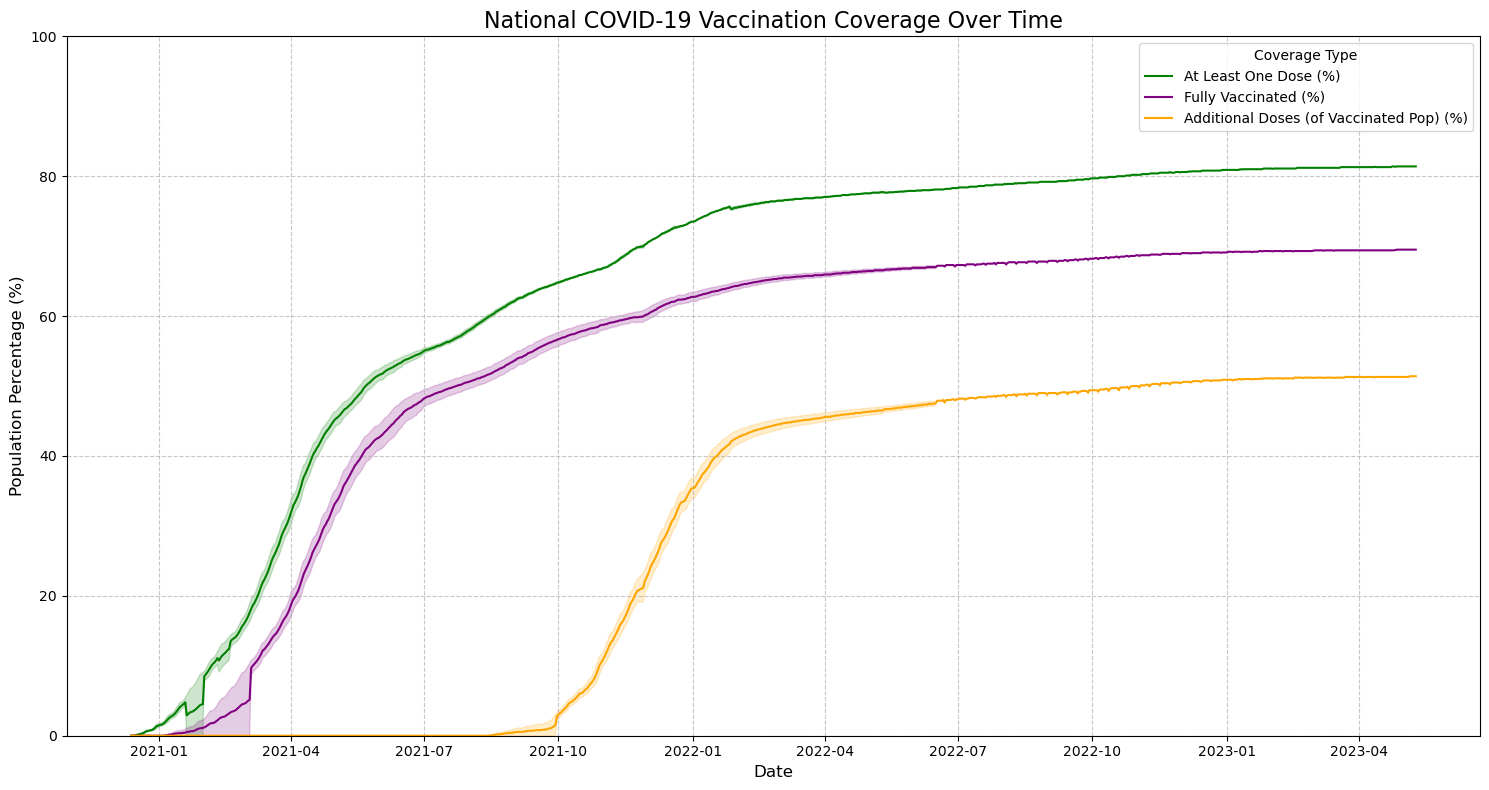

In [20]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=national_data, x='Date', y='Administered_Dose1_Pop_Pct', label='At Least One Dose (%)', color='green')
sns.lineplot(data=national_data, x='Date', y='Series_Complete_Pop_Pct', label='Fully Vaccinated (%)', color='purple')
sns.lineplot(data=national_data, x='Date', y='Additional_Doses_Vax_Pct', label='Additional Doses (of Vaccinated Pop) (%)', color='orange')

plt.title('National COVID-19 Vaccination Coverage Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Population Percentage (%)', fontsize=12)
plt.ylim(0, 100) # Percentages are naturally 0-100
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Coverage Type')
plt.tight_layout()
plt.show()


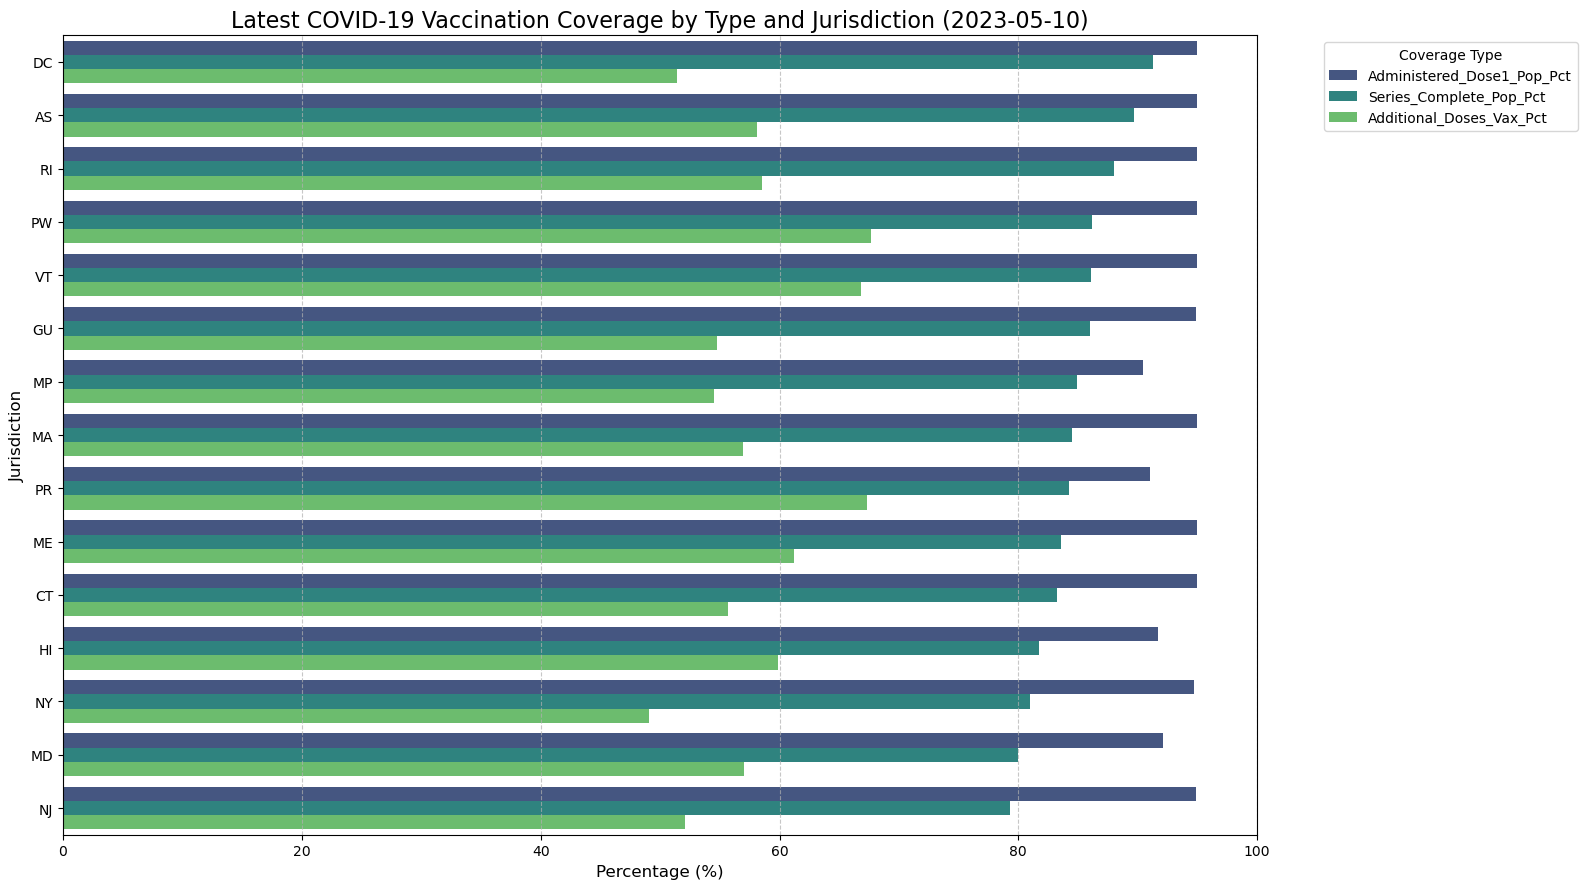

In [21]:
# 1.2 Latest State-Level Comparison of Coverage Percentages (Bar Plot)
latest_date = covid_19_sorted['Date'].max() # recalling the datime conversion
latest_state_data = covid_19_sorted[(covid_19_sorted['Date'] == latest_date) & (covid_19_sorted['Location'] != 'US')].copy()
latest_state_data_sorted = latest_state_data.sort_values(by='Series_Complete_Pop_Pct', ascending=False).head(15)

plot_data_melted = latest_state_data_sorted.melt(
    id_vars=['Location'],
    value_vars=['Administered_Dose1_Pop_Pct', 'Series_Complete_Pop_Pct', 'Additional_Doses_Vax_Pct'],
    var_name='Coverage_Type',
    value_name='Percentage'
)

plt.figure(figsize=(16, 9))
sns.barplot(
    data=plot_data_melted,
    x='Percentage',
    y='Location',
    hue='Coverage_Type',
    palette='viridis',
    orient='h'
)
plt.title(f'Latest COVID-19 Vaccination Coverage by Type and Jurisdiction ({latest_date.strftime("%Y-%m-%d")})', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Jurisdiction', fontsize=12)
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Coverage Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


--- NEW: State-wise Vaccination Coverage Over Time (Line Plot) ---


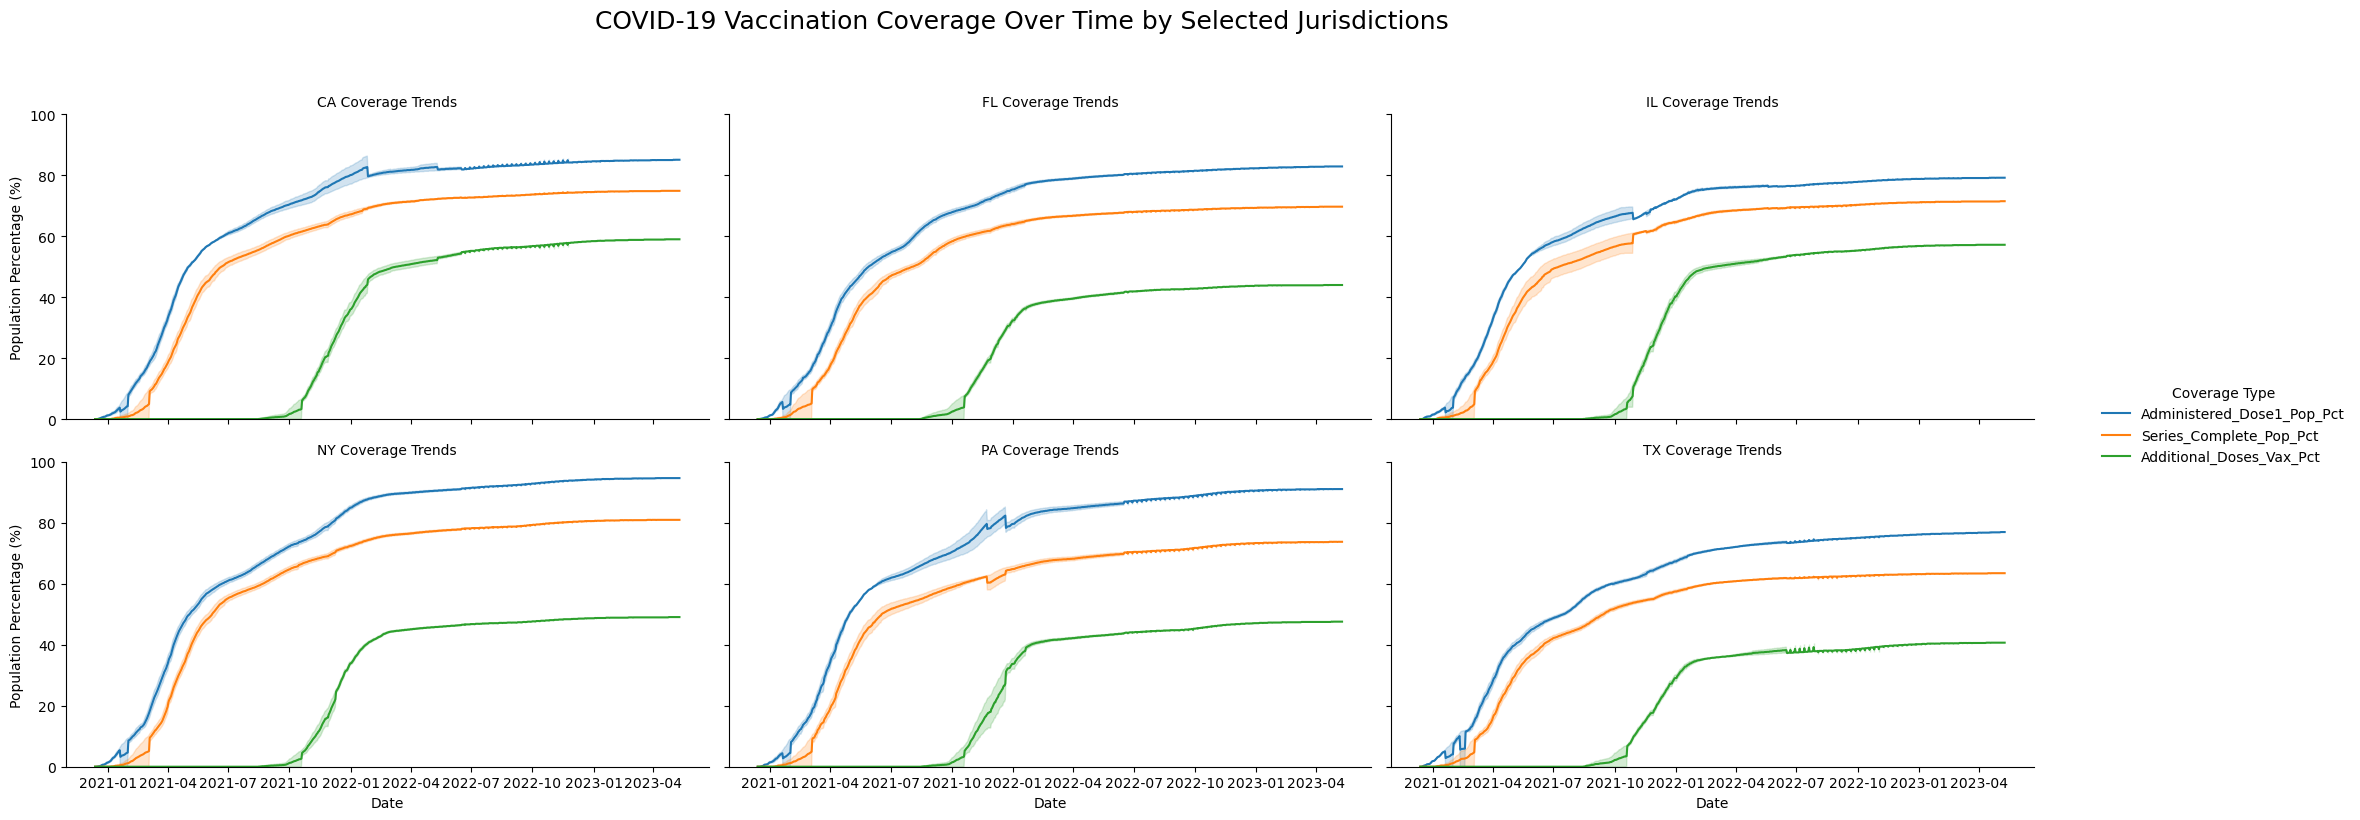

In [22]:
# --1.3 State-wise Vaccination Coverage Over Time (Line Plot) ---
print("\n--- NEW: State-wise Vaccination Coverage Over Time (Line Plot) ---")

# Select a few representative states for this plot to avoid clutter
selected_states_for_percentage_plot = ['CA', 'NY', 'TX', 'FL', 'IL', 'PA'] # Example states

# Filter the DataFrame for these selected states
df_selected_states_pct = covid_19_sorted[
    covid_19_sorted['Location'].isin(selected_states_for_percentage_plot)
].copy()

# since there are multiple percentage colums we can melt DataFrame to long format for easier plotting 
# for each state over time
plot_data_state_pct_melted = df_selected_states_pct.melt(
    id_vars=['Date', 'Location'],
    value_vars=['Administered_Dose1_Pop_Pct', 'Series_Complete_Pop_Pct', 'Additional_Doses_Vax_Pct'],
    var_name='Coverage_Type',
    value_name='Percentage'
)
  #Plotting each coverage type for each selected state
g = sns.FacetGrid(
    plot_data_state_pct_melted,
    col='Location', # Create a separate subplot for each location
    col_wrap=3,     # Wrap plots into 3 columns
    height=4, aspect=1.5, # Adjust subplot size
    sharey=True     # Share y-axis across subplots for easy comparison of percentages
)
g.map_dataframe(
    sns.lineplot,
    x='Date',
    y='Percentage',
    hue='Coverage_Type',
    linewidth=1.5
)
g.set_axis_labels('Date', 'Population Percentage (%)')
g.set_titles(col_template='{col_name} Coverage Trends') # Title for each subplot
g.set(ylim=(0, 100)) # Ensure y-axis for percentage is 0-100
g.add_legend(title='Coverage Type', bbox_to_anchor=(1.02, 0.5), loc='center left') # Common legend
plt.suptitle('COVID-19 Vaccination Coverage Over Time by Selected Jurisdictions', y=1.02, fontsize=18) # Overall title
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout for suptitle and legend
plt.show()



--- Analyzing Specific Booster Campaigns ---


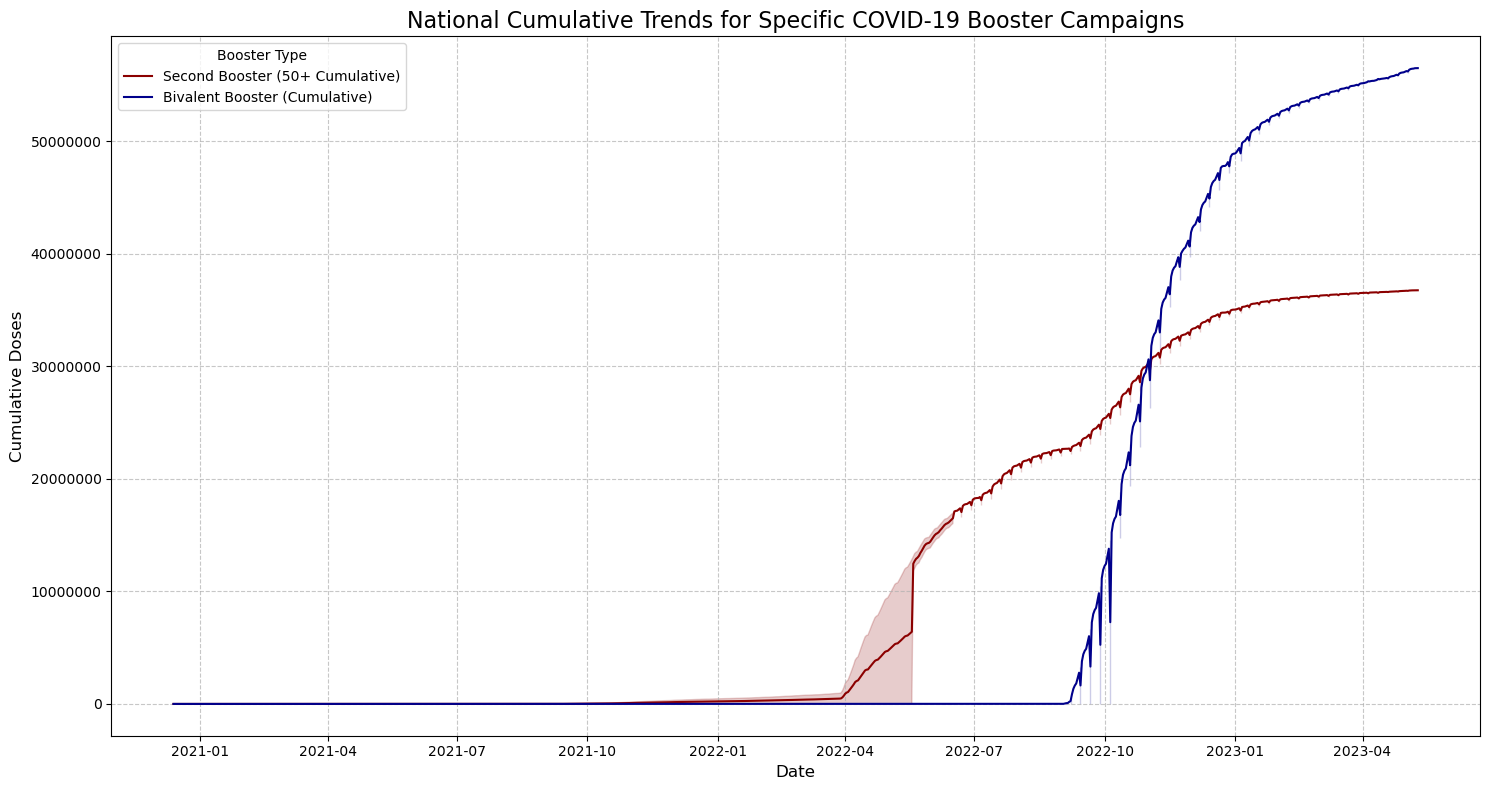

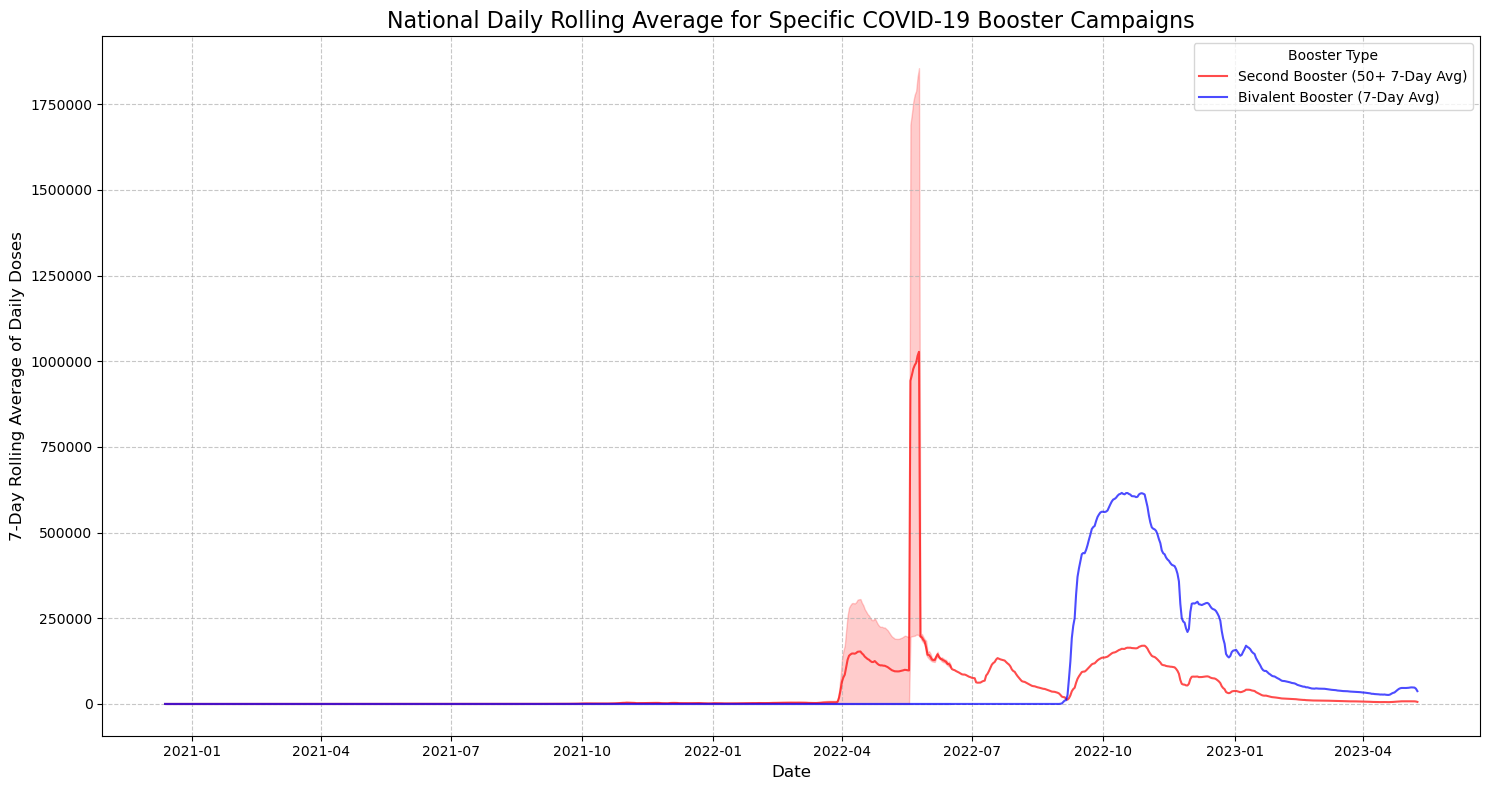

In [23]:
# --- Analysis 2: Analyze Specific Booster Campaigns ---

print("\n--- Analyzing Specific Booster Campaigns ---")

# 2.1 National Cumulative Trends for Specific Boosters
plt.figure(figsize=(15, 8))
sns.lineplot(data=national_data, x='Date', y='Second_Booster_50Plus_Cumulative', label='Second Booster (50+ Cumulative)', color='darkred')
sns.lineplot(data=national_data, x='Date', y='Bivalent_Booster_Cumulative', label='Bivalent Booster (Cumulative)', color='darkblue')

plt.title('National Cumulative Trends for Specific COVID-19 Booster Campaigns', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Doses', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Booster Type')
plt.tight_layout()
plt.show()

# 2.2 National Daily Rolling Average Trends for Specific Boosters
plt.figure(figsize=(15, 8))
sns.lineplot(data=national_data, x='Date', y='Second_Booster_50Plus_7_Day_Rolling_Average', label='Second Booster (50+ 7-Day Avg)', color='red', alpha=0.7)
sns.lineplot(data=national_data, x='Date', y='Bivalent_Booster_7_Day_Rolling_Average', label='Bivalent Booster (7-Day Avg)', color='blue', alpha=0.7)

plt.title('National Daily Rolling Average for Specific COVID-19 Booster Campaigns', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('7-Day Rolling Average of Daily Doses', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Booster Type')
plt.tight_layout()
plt.show()


--- Examining Daily Vaccination Rates (7-Day Rolling Average) ---


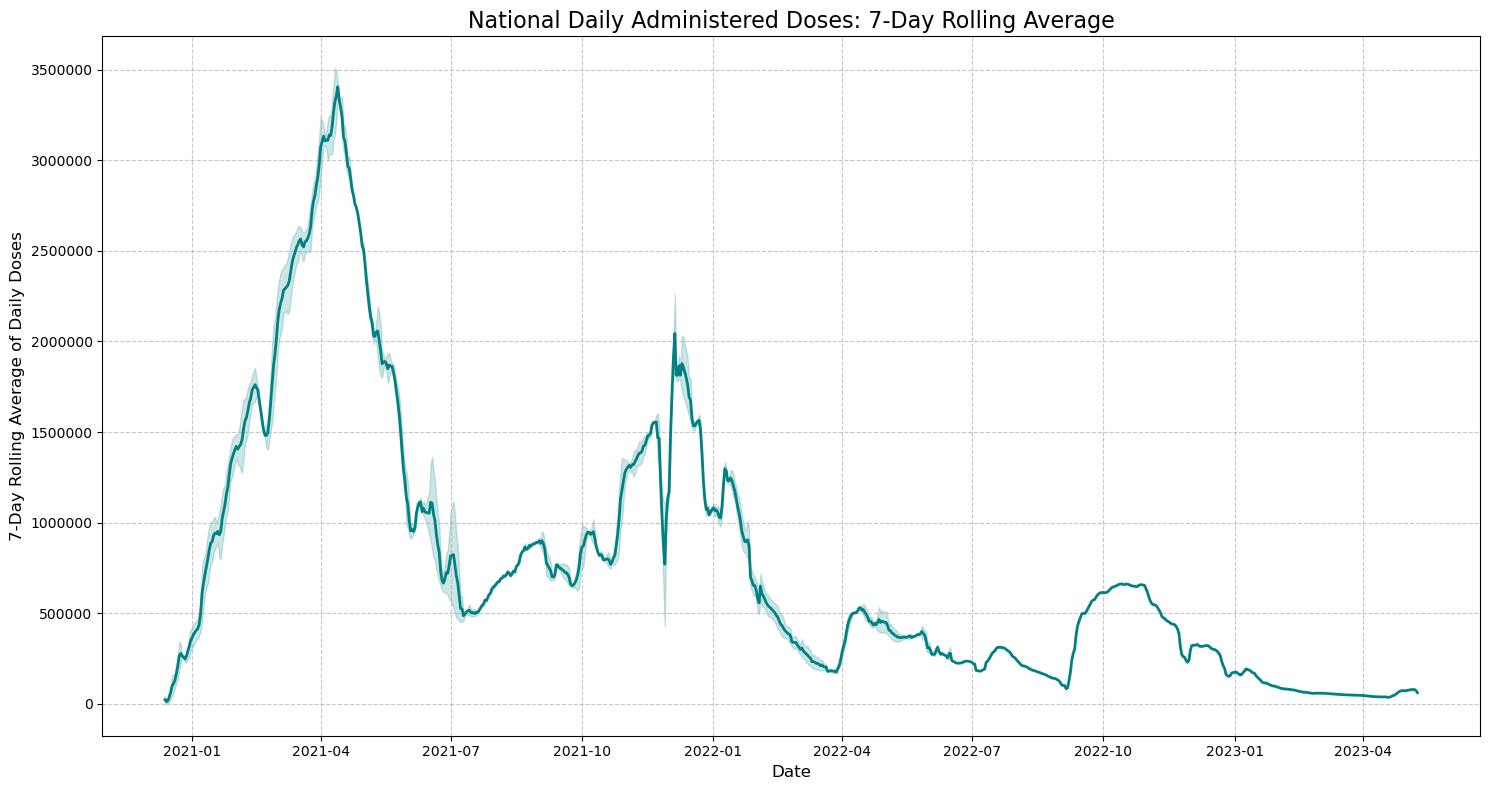

In [ ]:
# --- Analysis 3: Examine Daily Vaccination Rates ---

print("\n--- Examining Daily Vaccination Rates (7-Day Rolling Average) ---")

# 3.1 National Daily Administered 7-Day Rolling Average
plt.figure(figsize=(15, 8))
sns.lineplot(data=national_data, x='Date', y='Administered_7_Day_Rolling_Average', color='teal', linewidth=2)

plt.title('National Daily Administered Doses: 7-Day Rolling Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('7-Day Rolling Average of Daily Doses', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3.2 Daily Administered 7-Day Rolling Average for Selected States
selected_states_for_daily_plot = ['CA','TX', 'FL','NY','PA','IL']
df_selected_states_daily = covid_19_sorted[
    covid_19_sorted['Location'].isin(selected_states_for_daily_plot)
].copy()

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=df_selected_states_daily,
    x='Date',
    y='Administered_7_Day_Rolling_Average',
    hue='Location',
    linewidth=1.5,
    palette='tab10'
)
plt.title('Daily Administered Doses: 7-Day Rolling Average by Selected Jurisdictions', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('7-Day Rolling Average of Daily Doses', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Jurisdiction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# ----KEY FINDINGS ----
 # 1. Vaccination Coverage Percentages
   # National Level:
     # S-Curve Growth:  Initial rapid increase in Administered_Dose1_Pop_Pct and Series_Complete_Pop_Pct (an "S-curve" shape), 
 # indicating a swift initial rollout and adoption, followed by a plateau as a large portion of the eligible population gets vaccinated.
    # Coverage Gaps: A persistent, noticeable gap between Administered_Dose1_Pop_Pct (at least one dose) and Series_Complete_Pop_Pct
 # (fully vaccinated) indicates people who initiated vaccination but did not complete their primary series.
    # Booster Lag: The Additional_Doses_Vax_Pct (boosters as a percentage of vaccinated population) would typically lag significantly
 # behind the primary series completion, showing that booster uptake is a more gradual and often less comprehensive process than 
 # initial vaccination.

In [ ]:
 # ---State-wise Level (Bar Plot & Line Plots):
 # Varying Adoption: Significant disparities in Series_Complete_Pop_Pct (and other metrics) across states would highlight differences 
 #in public health campaigns, public acceptance, demographic factors, or policy impacts.
 # Consistent Leaders/Laggards: Some states might consistently maintain higher or lower vaccination percentages across all 
# categories (first dose, complete series, boosters) compared to the national average or other states.
 # Booster Willingness: 
# You might find states with high primary series coverage but lower booster uptake, suggesting varying willingness
 # for additional doses even among the already vaccinated.

In [ ]:
 # 2. Specific Booster Campaigns (Second_Booster_50Plus and Bivalent_Booster)
 # Campaign Specificity: A clear starting points for these campaigns, often marked by a sharp increase in daily administration 
# and cumulative counts.
 # Targeted Uptake: The Second_Booster_50Plus would likely show a more concentrated uptake among older populations,
# while Bivalent_Booster might have a broader (though still declining) uptake across the eligible population.
 # Diminishing Returns: Successive booster campaigns (Booster_Cumulative then Second_Booster_50Plus_Cumulative 
# then Bivalent_Booster_Cumulative) might show progressively lower overall cumulative totals, indicating declining uptake 
 # with each subsequent recommendation.
I # Impact of Variants: Surges in Bivalent_Booster_Daily might correlate with the emergence or dominance of new variants, 
# suggesting a responsive increase in public interest for updated protection.

In [ ]:
# 3. Daily Vaccination Rates (Administered_7_Day_Rolling_Average)

 # Peak Vaccination Periods:  
# identify distinct peaks in Administered_7_Day_Rolling_Average 
# (e.g., in early 2021 when vaccines first became widely available, or during periods of expanded eligibility), 
# followed by a gradual decline.
 # Weekend Dips/Weekday Surges: 
 # While the 7-day rolling average smooths this out, examining the underlying daily data 
# (not directly plotted here, but can be inferred) would likely show lower vaccination rates on weekends and holidays.
 # Pace Variation by State: 
# Comparing the Administered_7_Day_Rolling_Average across selected states would reveal differences 
# in their operational capacity and speed of rollout. Some states might have achieved higher peaks earlier, while others 
# had more consistent, lower-level administration over a longer period.
# Impact of Events: Sharp drops or surges in the rolling average could correspond to major news events,
# policy changes, or vaccine supply chain issues.